In [1]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import  DataLoader, Dataset
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.io import loadmat
torch.manual_seed(1)
scaler = preprocessing.StandardScaler()

In [25]:
recovered_global = np.loadtxt('C:\\Users\\Fahad\OneDrive - stud.uni-saarland.de\\DS project\\Dataset\\time_series_covid19_recovered_global.csv', delimiter=',', usecols= range(4,146), skiprows= 1)
deaths_global = np.loadtxt('C:\\Users\\Fahad\OneDrive - stud.uni-saarland.de\\DS project\\Dataset\\time_series_covid19_deaths_global.csv', delimiter=',', usecols= range(4,146), skiprows= 1)
confirmed_global = np.loadtxt('C:\\Users\\Fahad\OneDrive - stud.uni-saarland.de\\DS project\\Dataset\\time_series_covid19_confirmed_global.csv', delimiter=',', usecols= range(4,146), skiprows= 1)

In [26]:
print(confirmed_global)

[[0.0000e+00 0.0000e+00 0.0000e+00 ... 2.1459e+04 2.2142e+04 2.2890e+04]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.2990e+03 1.3410e+03 1.3850e+03]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.0382e+04 1.0484e+04 1.0589e+04]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.4100e+02 1.6200e+02 1.6200e+02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 4.6900e+03 4.7630e+03 4.8340e+03]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 4.0000e+00 4.0000e+00 4.0000e+00]]


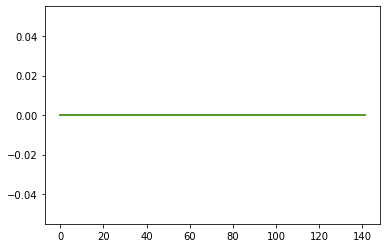

In [32]:
confirmed_global = torch.tensor(confirmed_global)
plt.plot(confirmed_global[25,:], label="confirmed")
confirmed_global = torch.tensor(deaths_global)
plt.plot(confirmed_global[25,:], label="deaths")
recovered_global = torch.tensor(recovered_global)
plt.plot(confirmed_global[25,:], label="recovered")
plt.show()